# Knights Tour Algorithm


Info about the Knights Tour problem as described by wikipedia:

A knight's tour is a sequence of moves of a knight on a chessboard such that the knight visits every square only once. If the knight ends on a square that is one knight's move from the beginning square (so that it could tour the board again immediately, following the same path), the tour is closed, otherwise it is open.

For more info: https://en.wikipedia.org/wiki/Knight%27s_tour

### Contents

* [Decision Draws](#Desicion-Draws)
* [Success Rate](#Success-Rate)
* [Test Failures](#Test-Failures)
* [Solve Times](#Solve-Times)

A little about the code... It uses Warnsdoff's heuristic to try to find a knights tour on a MxN board where M and N are equal. This rule follows that you should choose the square with the least available of successor squares as your next move. This is implemented by a non recursive function that loops until it can find no more successor nodes or the tour has reached the length of completion. Finding the successor nodes is achieved by the `NodeSuccessors` function which loops through possible moves defined in the array Deltas which is filtered by the already visited squares and the dimensions of the board. The `SortedNodes` function then pics optimal solution by counting the number of successors for each node then in case of a draw taking into account the distance from the center. The option of backtracking is incorperated where the tie breaker ties. If on the first attempt a valid tour is not found then the program will back track to the last tie and try the alternative option.

A valid tour can be found from any start position 100% of the time for any MxN board >= 6 where M and N are both even. Where M and N are odd the program will find a valid route for about 75% of start positions. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import json
import knightsTour as KT

new = 'testdata/test-5-50update.json' # mixed dataset between tests
old = 'testdata/test4-50.min.json'

with open(old) as data_file:    
    data = json.load(data_file)

In [5]:
from visualisers import chessName
start = (4,1)
TOUR = KT.knightsTour(start, 8)

print(", ".join(chessName(square) for square in TOUR))

e2, g1, h3, f2, h1, g3, f1, h2, g4, h6, g8, e7, c8, a7, b5, a3, b1, d2, b3, a1, c2, e1, g2, h4, f3, d4, f5, g7, h5, f4, g6, h8, f7, d8, b7, a5, c6, b8, a6, b4, a2, c1, d3, e5, d7, f8, h7, g5, e6, c5, a4, b2, d1, c3, e4, f6, e8, d6, c4, e3, d5, b6, a8, c7


In [6]:
from visualisers import plot_board

def possibleMoves(X, Y):
    return len([(X + x, Y + y) for x, y in deltas     
                if (0 <= X + x < 8) and (0 <= Y + y < 8)])
deltas = KT.deltas

#plot_board(8, possibleMoves, 'Number of legal moves per square')

## Decision Draws

In case of a draw in a successors next number of possible moves Warnsdoffs Rule dosen't really suggest much apart from random selection.

### Euclidean Distance

Using pretty much the same equation as Pythagorean theorem, this is found as follows:

$$d(p,q) = \sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2}$$


In [7]:
import math
def euclideanDistance(x,y):
    center = float(size-1) / 2
    return round(math.sqrt((x - center)**2 + (y - center)**2),2)

size = 8
#plot_board(8, euclideanDistance, 'Euclidean distance from center')

In [8]:
def pholDescision(X, Y):
    pholDescision.visited = []
    def possibleMoves(X, Y):
        possible = ([(X + x, Y + y) for x, y in deltas     
                    if  (0 <= X + x < 8) and (0 <= Y + y < 8)
                    and (X + x, Y + y) not in pholDescision.visited])
        pholDescision.visited += possible
        return possible
    P = possibleMoves(X, Y)
    return (len(P) + sum([len(possibleMoves(x, y)) for x, y in P]))

#plot_board(8, pholDescision, 'Number of moves + number of moves for child nodes')

## Success Rate


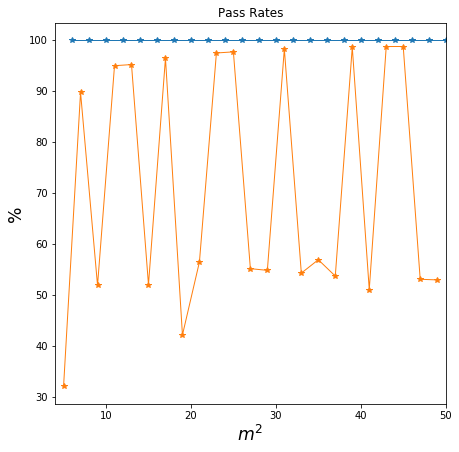

In [9]:
a = [d["_FAIL COUNT"] for d in data[1::2]]
b = [d["_TEST COUNT"] for d in data[1::2]]
_n = [d["_N"] for d in data[1::2]]

a2 = [d["_FAIL COUNT"] for d in data[0::2]]
b2 = [d["_TEST COUNT"] for d in data[0::2]]
_n2 = [d["_N"] for d in data[0::2]]
# PR = list(np.array(Test_counts)-np.array(Fail_counts))

PR = [(float(a_i if a_i else b_i) / b_i) * 100 for a_i, b_i in zip(a, b)]
PR2 = [(float(a_i if a_i else b_i) / b_i) * 100 for a_i, b_i in zip(a2, b2)]
plt.figure(figsize=(7,7))
plt.title('Pass Rates', size='large')
plt.xlim([4,50])
plt.ylabel('%', size='xx-large')
plt.xlabel(r'$m^2$', size='xx-large')
plt.plot(_n, PR, '*-', linewidth=1)
plt.plot(_n2, PR2, '*-', linewidth=1)
plt.show()

## Test Fails
 

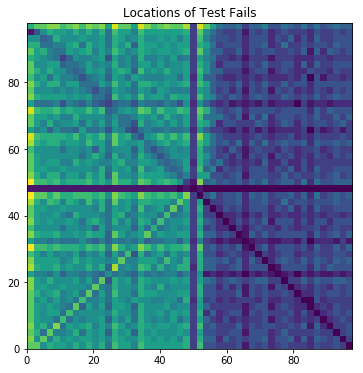

In [10]:
FAILS = [d["_FALSE STARTS"] for d in data if not d["_PASS"]]
_n = [d["_N"] for d in data if not d["_PASS"]]
Fx = []
Fy = []
for i, n in enumerate(_n):
    for x, y in FAILS[i]:
        R1 = float(x) / n
        R2 = float(y) / n
        Fx.append(round(R1 * 100, 2))
        Fy.append(round(R2 * 100, 2))

plt.figure(figsize=(6,6))
heatmap, xedges, yedges = np.histogram2d(Fx, Fy, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent)
plt.title('Locations of Test Fails', size='large')
plt.show()

## Solve Times

Execution times required to find a solution on a given board increased linearly. Averages were taken for each possible start position availible on the board. $T(n)$ where $n$ is the number of squares on the board. On tours where back tracking is need 

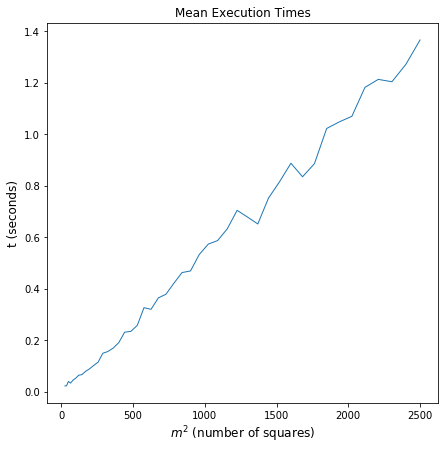

In [11]:
times = [d["_AVG TIME"] for d in data]
n = [d["_N"]**2 for d in data]

plt.figure(figsize=(7,7))
plt.title('Mean Execution Times', size='large')
plt.ylabel('t (seconds)', size='large')
plt.xlabel(r'$m^2$ (number of squares)', size='large')
plt.plot(n, times, '-', linewidth=1)
plt.show()